In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('figure1c.csv')
print(data)
#i need to get the means for each of the times 
#print(data['Unnamed: 2'])
IL_list = ['IL-2','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8']
IL2Means= data[IL_list].mean(axis=1)
IL2SE = data[IL_list].sem(axis=1) #get the standard error for the error bars
#print(IL2Means)
H9_list = ['H9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16']
H9Means= data[H9_list].mean(axis=1) 
H9SE = data[H9_list].sem(axis=1)
#print(H9Means)
H9T_list = ['H9T','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 24']
H9TMeans = data[H9T_list].mean(axis=1)
H9TSE = data[H9T_list].sem(axis=1)
#print(H9TMeans)

   Time (day)       IL-2  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0           0   1.000000     1.00000     1.00000     1.00000    1.000000   
1           2   2.570000     8.36000     7.28000     7.62000    3.780000   
2           4   6.682000    34.94480    23.07760    27.27960   12.322800   
3           6  16.437720    75.13132    32.53942    58.10555   33.641244   
4           8  25.642843   218.63210    78.74539   165.60080   76.365624   

   Unnamed: 6  Unnamed: 7  Unnamed: 8         H9  ...  Unnamed: 15  \
0    1.000000    1.000000    1.000000   1.000000  ...     1.000000   
1    3.860000    3.720000    3.480000   2.780000  ...     3.600000   
2   13.008200   13.131600   10.996800   7.589400  ...    13.104000   
3   37.203452   37.687692   30.241200  20.415486  ...    37.215360   
4   66.594179   66.707215   60.179988  32.460623  ...    62.149651   

   Unnamed: 16        H9T  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
0     1.000000   1.000000      1.00000   

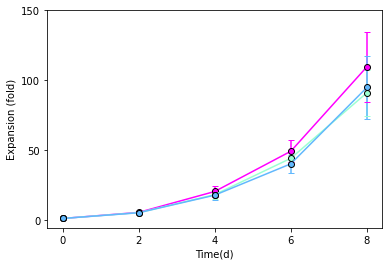

In [3]:
import matplotlib.pyplot as plt
time = [0,2,4,6,8]
ylabels = [0,50,100,150]
#plt.plot(time, IL2Means,marker = "o")
plt.errorbar(time,H9TMeans, H9TSE, capsize = 3, marker = "o", color = "magenta",markeredgecolor = "black")
#plt.plot(time,H9Means, marker = "o")
plt.errorbar(time, H9Means, H9SE, capsize = 3, marker = "o", color = '#9CFFD2',markeredgecolor = "black")
#plt.plot(time,H9TMeans, marker = "o")
plt.errorbar(time,IL2Means,IL2SE, capsize = 3, marker = "o", color = "#61B8FD",markeredgecolor = "black")
plt.ylabel('Expansion (fold)')
plt.xlabel('Time(d)')
plt.xticks(time)
plt.yticks(ylabels)
plt.show()

In [4]:
import numpy as np 
partd = pd.read_csv('figure1d.csv')
#print(partd)
#print(partd['IL-2'])
#we need to get the log of the concentration so log10nM column 
#then we need to take the means and the standard error for each type 
IL2d =['IL-2','Unnamed: 2','Unnamed: 3']
IL2dmeans= partd[IL2d].mean(axis=1)
IL2dSE = partd[IL2d].sem(axis=1)

H9d =['H9','Unnamed: 5','Unnamed: 6']
H9dmeans = partd[H9d].mean(axis=1)
H9dSE = partd[H9d].sem(axis=1)
#print(H9dmeans)
H9Td =['H9T','Unnamed: 8','Unnamed: 9']
H9Tdmeans = partd[H9Td].mean(axis=1)
H9dTSE = partd[H9Td].sem(axis=1)

#take the log of the concentration column 
logconc = np.log10(partd['Conc.(nM)'])
conc = partd['Conc.(nM)']
#print(logconc)
#print(partd['Conc.(nM)'])

(0.0, 120.0)

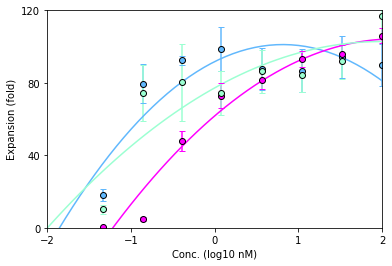

In [5]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#pars, cov = curve_fit(f=exponential, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf)) 
xlabels = [-2,-1,0,1,2]
ylabels = [0,40,80,120]

#curve = np.polyfit(logconc, IL2dmeans, 1)
#print(curve)
#y = ((np.exp(76.35)) * np.exp(13.65 *IL2dmeans))
#curve_fit = np.polyfit(logconc, IL2dmeans,1)
#print(curve_fit)
#y = np.exp(76.35)*np.exp(13.65*conc)
#plt.plot(sorted(conc), func(conc,*popt), label="Fitted Curve")

xn = np.linspace(-3,3,70)
popt = np.polyfit(logconc,IL2dmeans,2)
#print(popt)
yn = np.polyval(popt,xn)
plt.errorbar(logconc, IL2dmeans,IL2dSE,capsize = 3, marker = "o", color = '#61B8FD',ls= 'none', markeredgecolor = "black") #ls = none gets rid of the line connecting the points together
#plt.plot(conc, func(conc,*popt), label="Fitted Curve")
plt.plot(xn,yn,color = '#61B8FD')
#plt.plot(logconc, y_fit)
#plt.plot(logconc, IL2dmeans)
#plt.plot(logconcm,exponential(logcon, *pars))
#plt.plot(d,k)

popt2 = np.polyfit(logconc,H9Tdmeans,2)
yn2 = np.polyval(popt2,xn)
plt.plot(xn,yn2,color ="magenta")


popt3 = np.polyfit(logconc,H9dmeans,2)
yn3 = np.polyval(popt3,xn)
plt.plot(xn,yn3,color = '#9CFFD2')


plt.errorbar(logconc, H9Tdmeans,H9dTSE,capsize = 3, marker = "o", color = "magenta", ls= 'none',markeredgecolor = "black")
plt.errorbar(logconc, H9dmeans,H9dSE,capsize = 3, marker = "o", color = '#9CFFD2', ls = 'none',markeredgecolor = "black")
plt.xlabel('Conc. (log10 nM)')
plt.ylabel('Expansion (fold)')
plt.xticks(xlabels)
plt.yticks(ylabels)
plt.xlim(-2,2)
plt.ylim(0,120)

In [6]:
parte = pd.read_csv('figure1e.csv')
#print(parte)

In [7]:
IL2e = ['IL-2','Unnamed: 2','Unnamed: 3','Unnamed: 4']
IL2eMeans= parte[IL2e].mean(axis=1)
IL2eSE = parte[IL2e].sem(axis=1)

H9e =['H9','Unnamed: 6','Unnamed: 7','Unnamed: 8']
H9emeans = parte[H9e].mean(axis=1)
H9eSE = parte[H9e].sem(axis=1)

H9Te =['H9T','Unnamed: 10','Unnamed: 11','Unnamed: 12']
H9Temeans = parte[H9Te].mean(axis=1)
H9eTSE = parte[H9Te].sem(axis=1)

([<matplotlib.axis.YTick at 0x7fb25ebc8820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

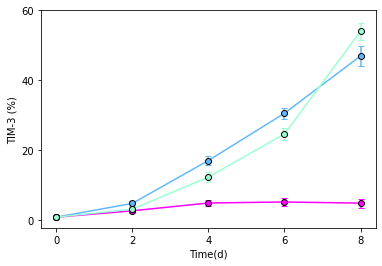

In [8]:
time = [0,2,4,6,8]
ylabels = [0,20,40,60]
plt.errorbar(time, IL2eMeans,IL2eSE,capsize = 3, marker = "o", color = '#61B8FD', markeredgecolor = "black") 
plt.errorbar(time, H9Temeans,H9eTSE,capsize = 3, marker = "o", color = "magenta",markeredgecolor = "black")
plt.errorbar(time, H9emeans,H9eSE,capsize = 3, marker = "o", color = '#9CFFD2',markeredgecolor = "black")
plt.xlabel('Time(d)')
plt.ylabel('TIM-3 (%)')
plt.xticks(time)
plt.yticks(ylabels)


In [9]:
partf = pd.read_csv('figure1f.csv')
print(partf)

   Conc.(nM)  IL-2  Unnamed: 2  Unnamed: 3     H9  Unnamed: 5  Unnamed: 6  \
0      0.046   2.3        2.12        2.43   2.37        1.82        2.47   
1      0.140  10.1       20.20       17.20  15.40       13.50       15.40   
2      0.410  35.2       41.00       41.50  36.80       41.80       45.10   
3      1.200  41.7       46.30       46.60  38.90       39.90       48.50   
4      3.700  35.7       41.50       46.60  42.10       43.50       49.90   
5     11.100  36.0       40.40       47.70  36.30       39.50       47.30   
6     33.300  39.2       39.30       45.30  34.20       37.20       44.40   
7    100.000  34.2       29.10       33.10  30.90       32.60       36.10   

    H9T  Unnamed: 8  Unnamed: 9  
0  0.00        0.00        0.00  
1  0.75        1.13        1.51  
2  3.92        2.27        1.71  
3  5.00        4.37        3.70  
4  6.86        5.93        5.00  
5  8.39        6.85        5.19  
6  4.78        5.74        4.67  
7  3.25        2.99        3.09  


In [10]:
#need to take the log of the conc column
IL2f =['IL-2','Unnamed: 2','Unnamed: 3']
IL2fmeans= partf[IL2f].mean(axis=1)
IL2fSE = partf[IL2f].sem(axis=1)

H9f =['H9','Unnamed: 5','Unnamed: 6']
H9fmeans = partf[H9f].mean(axis=1)
H9fSE = partf[H9f].sem(axis=1)
#print(H9dmeans)
H9Tf =['H9T','Unnamed: 8','Unnamed: 9']
H9Tfmeans = partf[H9Tf].mean(axis=1)
H9fTSE = partf[H9Tf].sem(axis=1)

#take the log of the concentration column 
logconcf = np.log10(partf['Conc.(nM)'])

1.3847722830782734
3.1727422764201116


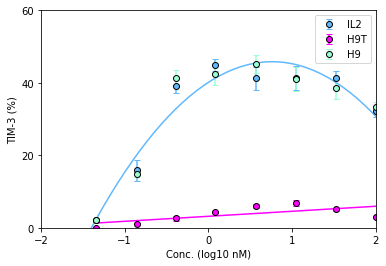

In [11]:
xlabels = [-2,-1,0,1,2]
ylabels = [0,20,40,60]


xnf = np.linspace(-3,3,70)
popt = np.polyfit(logconcf,IL2fmeans,2)
#print(popt)
ynf = np.polyval(popt,xnf)
plt.plot(xnf,ynf,color = '#61B8FD')


m,b = np.polyfit(logconcf,H9Tfmeans,1)
print(m)
print(b)
plt.plot(logconcf, ((m*logconcf)+b), color = "magenta")





plt.errorbar(logconcf, IL2fmeans,IL2fSE,capsize = 3, marker = "o", color = '#61B8FD', ls= 'none', markeredgecolor = "black", label = 'IL2') #ls = none gets rid of the line connecting the points together
#plt.plot(logconc,m* logconc +b )
#plt.plot(logconcm,exponential(logcon, *pars))
plt.errorbar(logconcf, H9Tfmeans,H9fTSE,capsize = 3, marker = "o", color = "magenta", ls= 'none',markeredgecolor = "black", label = 'H9T')
plt.errorbar(logconcf, H9fmeans,H9fSE,capsize = 3, marker = "o", color = '#9CFFD2', ls = 'none',markeredgecolor = "black", label = 'H9')
plt.xlabel('Conc. (log10 nM)')
plt.ylabel('TIM-3 (%)')
plt.xticks(xlabels)
plt.yticks(ylabels)
plt.ylim(0,60)
plt.xlim(-2,2)

#labels = ['IL2',"H9T",'H9']
plt.legend()